In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import numpy as np
import os
import pickle
from skimage.transform import rescale, rotate
import noise
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, os.getcwd()+"/../..") # Not needed if you installed SyMBac using pip
from SyMBac.drawing import raster_cell
from SyMBac.colony_simulation import ColonySimulation

In [15]:
colonysim = ColonySimulation(
    cellmodeller_model= 'cellmodeller_ex1_simpleGrowth_modified.py',
    max_cells = 50,
    pix_mic_conv = 0.065,
    resize_amount = 3,
    save_dir = "dx_test/",
)

colonysim.run_cellmodeller_sim(num_sim=1)
colonysim.get_simulation_dirs()
pickles = colonysim.get_simulation_pickles()
colonysim.get_max_scene_size()

FRAME_CNT = len(pickles[-1])

Creating directory data/dx_test/
Set up OpenCL context:
  Platform: NVIDIA CUDA
  Device: NVIDIA GeForce GTX 1650
Importing model cellmodeller_ex1_simpleGrowth_modified
      10           2 cells           0 contacts    0.000023 hour(s) or 0.001394 minute(s) or 0.083629 second(s)
      20           2 cells           0 contacts    0.000038 hour(s) or 0.002274 minute(s) or 0.136439 second(s)
      30           2 cells           0 contacts    0.000052 hour(s) or 0.003120 minute(s) or 0.187199 second(s)
      40           4 cells           2 contacts    0.000080 hour(s) or 0.004819 minute(s) or 0.289169 second(s)
   40     4 cells       2 cts       1 iterations  residual = 0.004554
      50           4 cells           2 contacts    0.000112 hour(s) or 0.006738 minute(s) or 0.404291 second(s)
   50     4 cells       2 cts       2 iterations  residual = 0.000008
      60           4 cells           2 contacts    0.000146 hour(s) or 0.008783 minute(s) or 0.526961 second(s)
   60     4 cells  

In [16]:
colonysim.draw_simulation_OPL(n_jobs = 1, FL=True, density = 0.1, random_distribution = "uniform", distribution_args = (0.9, 3))

Scene Draw:: 0it [00:00, ?it/s]

/home/boomalope/symbac/symbac/tests/dx_test_env/../../SyMBac/drawing.py:474: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  return remove_small_objects(label(mask))


In [17]:
from SyMBac.colony_renderer import ColonyRenderer
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import convolve_rescale
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter

from skimage.exposure import rescale_intensity


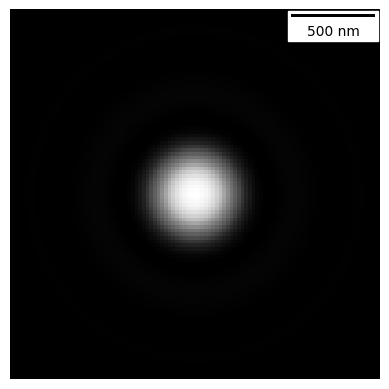

In [26]:

my_kernel = PSF_generator(
    radius = 50, 
    wavelength = 0.75, 
    NA = 1.45, 
    n = 1.4, 
    resize_amount = 3, 
    pix_mic_conv = 0.065, 
    apo_sigma = 8, 
    mode="simple fluo", 
    condenser = "Ph3",
    offset = 0.02
)
eye  = PSF_generator(
    radius = 0, 
    wavelength = 0.75, 
    NA = 1.45, 
    n = 1.4, 
    resize_amount = 3, 
    pix_mic_conv = 0.065, 
    apo_sigma = 8, 
    mode="simple fluo", 
    condenser = "Ph3",
    offset = 0.02
)
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

[1.49399783e-03 2.18896937e-03 2.88730625e-03 3.50164117e-03
 3.94643114e-03 4.15048744e-03 4.06920053e-03 3.69477121e-03
 3.06280896e-03 2.25392300e-03 1.38940497e-03 6.20746387e-04
 1.13493711e-04 2.67367268e-05 4.90263343e-04 1.58200029e-03
 3.30870883e-03 5.59294940e-03 8.26902899e-03 1.10899947e-02
 1.37467701e-02 1.58993173e-02 1.72183585e-02 1.74348257e-02
 1.63929839e-02 1.41022236e-02 1.07819740e-02 6.89414337e-03
 3.15800468e-03 5.43502595e-04 2.40523455e-04 3.60361874e-03
 1.20738600e-02 2.70817355e-02 4.99370678e-02 8.17136379e-02
 1.23137352e-01 1.74487250e-01 2.35518339e-01 3.05414112e-01
 3.82774779e-01 4.65644731e-01 5.51579890e-01 6.37752472e-01
 7.21087666e-01 7.98424015e-01 8.66687156e-01 9.23065170e-01
 9.65173363e-01 9.91196754e-01 1.00000000e+00 9.91196754e-01
 9.65173363e-01 9.23065170e-01 8.66687156e-01 7.98424015e-01
 7.21087666e-01 6.37752472e-01 5.51579890e-01 4.65644731e-01
 3.82774779e-01 3.05414112e-01 2.35518339e-01 1.74487250e-01
 1.23137352e-01 8.171363

/home/boomalope/symbac/symbac/tests/dx_test_env/../../SyMBac/PSF.py:178: RuntimeWarning: invalid value encountered in divide
  PSF = (2 * jv(1, rr) / (rr)) ** 2


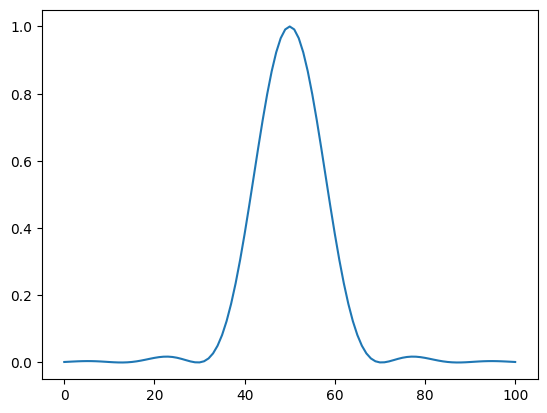

In [27]:
psf = my_kernel.get_fluorescence_kernel(my_kernel.wavelength,my_kernel.NA,my_kernel.n,my_kernel.radius,my_kernel.scale)
central_psf = psf[psf.shape[1]//2]
print(central_psf)
plt.plot(central_psf)

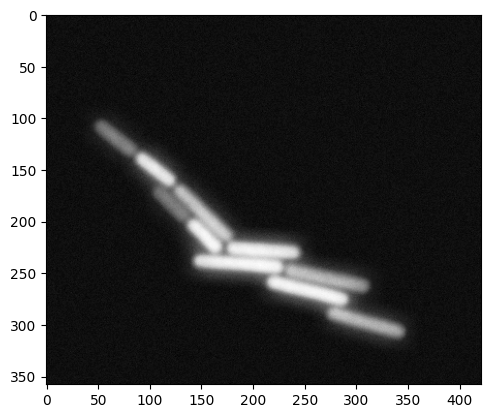

In [28]:
my_renderer = ColonyRenderer(colonysim, my_kernel)
test_img = my_renderer.render_scene(-1)
mask = my_renderer.mask_loader(-1)
plt.imshow(test_img, cmap="Greys_r")

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

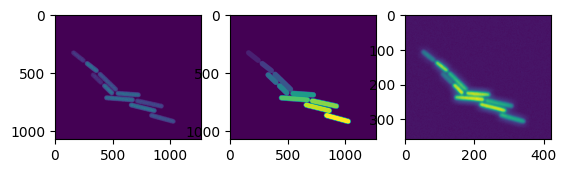

In [33]:
original = mpimg.imread('/home/boomalope/symbac/symbac/tests/dx_test_env/data/scenes/00{frame}.png'.format(frame=FRAME_CNT))
mask = mpimg.imread('/home/boomalope/symbac/symbac/tests/dx_test_env/data/masks/00{frame}.png'.format(frame=FRAME_CNT))    

#original = NormalizeData(original)
#mask = NormalizeData(mask)
#test_img = NormalizeData(test_img)
f, axarr = plt.subplots(1,3)
axarr[0].plot(100,100)
axarr[0].imshow(original)
axarr[1].imshow(mask)
axarr[2].imshow(test_img)
plt.show()

In [34]:
with open('ori.pkl', 'wb') as file: 
    pickle.dump(original, file)
with open('mask.pkl', 'wb') as file: 
    pickle.dump(mask, file)
with open('out.pkl', 'wb') as file: 
    pickle.dump(test_img, file)